Import Libraries

In [1]:
import numpy as np
import random
import gym
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Initialize Environment and Parameters

In [2]:
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# DQN parameters
gamma = 0.99                 # Discount rate
epsilon = 1.0                # Exploration rate
epsilon_min = 0.01           # Minimum exploration rate
epsilon_decay = 0.995        # Epsilon decay for gradual exploitation
learning_rate = 0.0005       # Lower learning rate for stable learning
batch_size = 32              # Larger batch size for stable updates
memory = deque(maxlen=2000)  # Replay memory

Build the Q-Network Model

In [3]:
def build_model():
    model = Sequential()
    model.add(Dense(48, input_shape=(state_size,), activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(action_size, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))
    return model

model = build_model()

c:\Users\ENGR. YAKUBU IKARA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Define Helper Functions

In [4]:
def choose_action(state):
    if np.random.rand() <= epsilon:
        return random.randrange(action_size)
    q_values = model.predict(state)
    return np.argmax(q_values[0])

def store_experience(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

def replay():
    if len(memory) < batch_size:
        return

    minibatch = random.sample(memory, batch_size)
    losses = []
    for state, action, reward, next_state, done in minibatch:
        target = reward
        if not done:
            target = reward + gamma * np.amax(model.predict(next_state)[0])
        target_f = model.predict(state)
        target_f[0][action] = target
        history = model.fit(state, target_f, epochs=1, verbose=0)
        losses.append(history.history['loss'][0])

    # Return average loss for this replay step
    return np.mean(losses) if losses else 0

Train the Model with Performance Metrics Tracking

In [14]:
# Training parameters
episodes = 500                # Increased for better training
max_steps_per_episode = 2000  # Maximum steps per episode

# Performance metrics
episode_rewards = []
average_losses = []
moving_average_rewards = []
success_threshold = 195  # CartPole success threshold

# Training loop
for e in range(episodes):
    global epsilon  # Declare epsilon as global

    # Reset the environment
    state, _ = env.reset() if isinstance(env.reset(), tuple) else (env.reset(), None)
    state = np.reshape(state, [1, state_size])
    total_reward = 0
    
    for time_step in range(max_steps_per_episode):
        # Choose an action and take a step
        action = choose_action(state)
        result = env.step(action)
        
        if len(result) == 5:
            next_state, reward, done, truncated, _ = result
            done = done or truncated
        else:
            next_state, reward, done, _ = result

        next_state = np.reshape(next_state, [1, state_size])

        # Store experience and train model
        store_experience(state, action, reward, next_state, done)
        if len(memory) > 500:
            avg_loss = replay()
            average_losses.append(avg_loss)
        
        state = next_state
        total_reward += reward
        
        if done:
            print(f"Episode: {e+1}/{episodes}, Score: {time_step+1}, Epsilon: {epsilon:.2}")
            break

    # Update performance metrics
    episode_rewards.append(total_reward)
    moving_average_rewards.append(np.mean(episode_rewards[-10:]))

    # Epsilon decay
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Episode: 2/50, Score: 10, Epsilon: 0.89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Episode: 9/50, Score: 9, Epsilon: 0.86
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14

Plot Performance Metrics

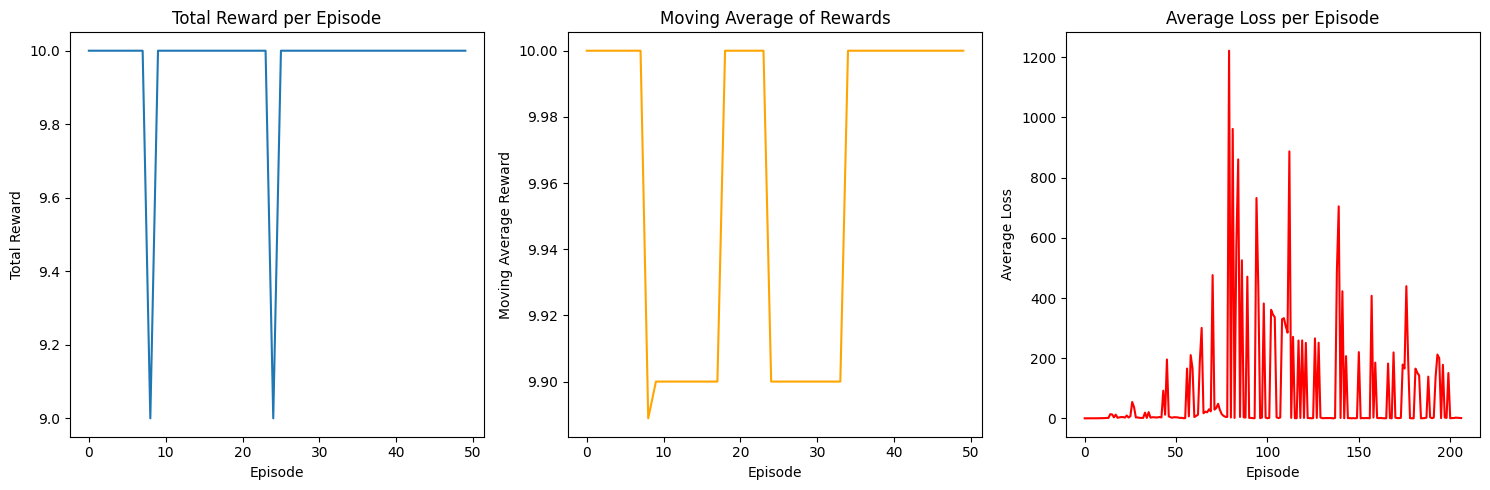

In [15]:
# Plot total rewards, moving average rewards, and average losses over episodes
plt.figure(figsize=(15, 5))

# Total Reward per Episode
plt.subplot(1, 3, 1)
plt.plot(episode_rewards, label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")

# Moving Average of Rewards
plt.subplot(1, 3, 2)
plt.plot(moving_average_rewards, label="Moving Average (last 10 episodes)", color='orange')
plt.xlabel("Episode")
plt.ylabel("Moving Average Reward")
plt.title("Moving Average of Rewards")

# Average Loss per Episode
plt.subplot(1, 3, 3)
plt.plot(average_losses, label="Average Loss", color='red')
plt.xlabel("Episode")
plt.ylabel("Average Loss")
plt.title("Average Loss per Episode")

plt.tight_layout()
plt.show()

Evaluate Success Rate and Average Reward

In [16]:
# Success rate and average reward calculation
success_count = sum([1 for reward in episode_rewards if reward >= success_threshold])
success_rate = (success_count / episodes) * 100
average_reward = np.mean(episode_rewards)

print(f"Average Reward: {average_reward:.2f}")
print(f"Success Rate: {success_rate:.2f}%")

Average Reward: 9.96
Success Rate: 0.00%


Compare with the Baseline Algorithm (Random Policy)

In [17]:
# Random policy evaluation
random_rewards = []
for episode in range(10):
    state, _ = env.reset() if isinstance(env.reset(), tuple) else (env.reset(), None)
    state = np.reshape(state, [1, state_size])
    total_reward = 0
    done = False
    
    while not done:
        action = env.action_space.sample()  # Random action
        next_state, reward, done, *info = env.step(action)  # Adjust unpacking here
        next_state = np.reshape(next_state, [1, state_size])
        total_reward += reward
        state = next_state

    random_rewards.append(total_reward)

print(f"Average Reward with Random Policy: {np.mean(random_rewards):.2f}")

Average Reward with Random Policy: 23.90


Save the Trained Model

In [18]:
# Save the model
model.save("dqn_cartpole_model.h5")
print("Model saved successfully.")

Model saved successfully.
